<a href="https://colab.research.google.com/github/AshayAswale/GoogleCodingCompetition/blob/master/homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#@title Imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math



x_train shape: (60000, 28, 28) y_train shape: (60000,)
Num GPUs Available:  1
x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover
x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


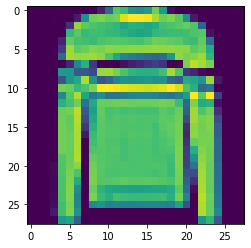

In [46]:
#@title Common code
#################################################################
# Insert TensorFlow code here to complete the tutorial in part 1.
#################################################################

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')


In [ ]:
#@title Part 1

model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [47]:
#@title Part 2.1 (Training Model)

#################################################################
# Insert TensorFlow code here to *train* the CNN for part 2.
#################################################################

model = tf.keras.Sequential()

# # Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=1, padding='valid', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="valid"))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# model.add(tf.keras.layers.Dense(1024))
# model.add(tf.keras.layers.ReLU())
# model.add(tf.keras.layers.Dense(10))
# model.add(tf.keras.layers.Softmax())

# Take a look at the model summary
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

# y_hat = model.predict(x_test)

# # Plot a random sample of 10 test images, their predicted labels and ground truth
# figure = plt.figure(figsize=(20, 8))
# for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
#     ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
#     # Display each image
#     ax.imshow(np.squeeze(x_test[index]))
#     predict_index = np.argmax(y_hat[index])
#     true_index = np.argmax(y_test[index])
#     # Set the title for each image
#     ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
#                                   fashion_mnist_labels[true_index]),
#                                   color=("green" if predict_index == true_index else "red"))


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 1)         0         
_________________________________________________________________
re_lu_12 (ReLU)              (None, 13, 13, 1)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 169)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              174080    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                10250     
Total params: 184,340
Trainable params: 184,340
Non-trainable params: 0
_______________________________________________

In [48]:
#@title getWVector(W1_raw, x_size):

def getWVector(W1_raw, b1_raw, x_size):
  layers = W1_raw.shape[-1]
  filter_size = W1_raw.shape[0]
  out_size = x_size - filter_size + 1
  # print(layers, filter_size, out_size)
  w_rows = layers*out_size*out_size
  w_cols = x_size*x_size
  # print(w_rows, w_cols)
  w1 = np.zeros((w_rows, w_cols))
  b1 = np.zeros((layers*out_size*out_size,))
  # print(b1)
  
  for layer in range(layers):
    wts = W1_raw[:,:,0,layer]
    # wts = wts.T
    # print(W1_raw[:,:,0,0])
    # b1[layer*x_size*x_size:x_size*x_size] = b1_raw[layer]
    b1[layer*out_size*out_size:(layer+1)*out_size*out_size] = b1_raw[layer]
    for counter_col in range(out_size):
      for counter_row in range(out_size):
        for w_col in range(filter_size):
          col = counter_col*out_size + counter_row + layer * out_size*out_size
          row = counter_col*x_size + counter_row + w_col*x_size
          w1[col, row:row+filter_size] = wts[w_col, :]

  return w1, b1

# w=np.zeros((2,2,1,1))
# w[:,:,0,0] = np.array([[11,12],[21,22]])
# # W1_raw, b1_raw, W2_raw, b2_raw, W3_raw, b3_raw = model.trainable_variables
# # W1, b1 = getWVector(W1_raw, b1_raw, x_size)
# print(w[:,:,0,0])
# b = np.array([1])
# W1, b1 = getWVector(w, b, 3)
# print(W1)
# print(b1)

In [ ]:
# print(W1[676])
# print(b1.shape)
print(x_train.shape)

In [ ]:
# W1_raw = np.reshape(W1_raw, (3,3,64))
print(b1_raw[0])
# print(b1[0], b1[])
print(b1[0], b1[675], b1[676])
# print(W1_raw[:,:,1])

In [49]:
#@title Part 2.2 (Get Weights and Biases)


#################################################################
# Write a method to extract the weights from the trained
# TensorFlow model. In particular, be *careful* of the fact that
# TensorFlow packs the convolution kernels as KxKx1xF, where
# K is the width of the filter and F is the number of filters.
#################################################################


def convertWeights (model, x_size):
    # Extract W1, b1, W2, b2, W3, b3 from model.
    # ...
    W1_raw, b1_raw, W2_raw, b2_raw, W3_raw, b3_raw = model.trainable_variables

    W1_raw = np.array(W1_raw)
    b1_raw = np.array(b1_raw)
    W2 = np.array(W2_raw)
    b2 = np.array(b2_raw)
    W3 = np.array(W3_raw)
    b3 = np.array(b3_raw)

    W1, b1 = getWVector(W1_raw, b1_raw, x_size)
    # W2=[]
    # b2=[]
    # W3=[]
    # b3=[]


    return W1, b1, W2, b2, W3, b3


In [53]:
#@title Part 2.3 (maxPool (x, w, b, num_layers, pool_size, stride))

def maxPool (x, w, b, num_layers, pool_size, stride):
  layers = num_layers
  out_size = (int)(math.sqrt(w.shape[0]/layers))

  x_int = x.flatten()
  interm = np.dot(w,x_int)#+b
  # return interm 
  interm = np.reshape(interm, (layers, out_size, out_size))
  # print(interm)
  
  pool_out_size = int(out_size/pool_size)
  
  pool = np.zeros((layers, pool_out_size, pool_out_size))
  
  for layer in range(layers):
    x_l = interm[layer]
    for i in range(pool_out_size):
      for j in range(pool_out_size):
        pool[layer, i, j] = np.max(x_l[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size])
        
  return pool.flatten()

# w = np.zeros((2,2,1,2))

# arr = [[1,5,1,1,1],[2,2,2,2,1],[3,8,3,3,1],[4,4,0,4,1], [5,5,5,5,1]]
# x = np.zeros((1,5,5,1))
# x[0,:,:,0] = arr
# print(x.shape)


# W1, b1, W2, b2, W3, b3 = convertWeights (model,x_size)


# w[:,:,0,0] = np.array([[11,12],[21,22]])
# w[:,:,0,1] = np.array([[41,22],[61,12]])
# b = np.array([1, 2])
# W1, b1 = getWVector(w, b, 5)
# print(W1.shape)
# i = maxPool(x, W1, b1, 2,2,2)
# print(i)


# w = np.zeros((2,2,1,1))
# x = np.array([[[1,5,1,5,1,1,1],[2,2,2,2,1,2,1],[3,8,3,3,3,3,1],[4,4,0,4,0,4,1], [5,5,5,5,1,5,1],[4,4,0,4,0,4,1],[3,8,3,3,3,3,1]]])
# w[:,:,0,0] = np.array([[11,12],[21,22]])
# b = np.array([1])
# W1, b1 = getWVector(w, b, 7)
# i = maxPool(x, W1, b1, 1,2,2)
# print(i)


In [51]:
#@title getYHat(zs):
def getYHat(zs):
    exp_z = np.exp(zs)
    # print(zs.shape)
    exp_z_sums = np.sum(exp_z, axis=0)
    y_hat = (exp_z/exp_z_sums)
    # print(y_hat.shape)
    return y_hat

In [54]:
x_size = x_train.shape[1]

count = 0
for i in range(100):
  yhat1 = model.predict(x_train[i:i+1,:,:,:])[0]  # Save model's output
  # print(x_train[i:i+1,:,:,:].shape)

  W1, b1, W2, b2, W3, b3 = convertWeights (model,x_size)
  x1 = maxPool(x_train[i:i+1,:,:,:], W1, b1, 1, 2, 2)
  h1 = np.maximum(0, x1)

  x2 = np.dot(W2.T,h1)+b2
  h2 = np.maximum(0,x2)

  x3 = np.dot(W3.T, x2)+b3

  # print(x3.shape)
  y_hat = getYHat(x3)
  int_1 = np.argmax(y_hat)
  int_2 = np.argmax(yhat1)
  # print(y_hat)
  # print(yhat1)
  if(int_1 == int_2):
    count +=1
print("accuracy:", count)
# print(y_hat)
# print(yhat1)
# print(np.argmax(y_hat))
# print(np.argmax(yhat1))


accuracy: 66


In [ ]:
#@title Part 2.3



In [ ]:
#@title  Default Code

yhat1 = model.predict(x_train[0:1,:,:,:])[0]  # Save model's output

x_size = x_train.shape[1]

W1, b1, W2, b2, W3, b3 = convertWeights (model,x_size)

#################################################################
# Below here, use numpy code ONLY (i.e., no TensorFlow) to use the
# extracted weights to replicate the output of the TensorFlow model.
#################################################################

# Implement a fully-connected layer. For simplicity, it only needs
# to work on one example at a time (i.e., does not need to be
# vectorized across multiple examples).
def fullyConnected (W, b, x):
    pass

# Implement a max-pooling layer. For simplicity, it only needs
# to work on one example at a time (i.e., does not need to be
# vectorized across multiple examples).
def maxPool (x, poolingWidth):
    pass

# Implement a softmax function.
def softmax (x):
    pass

# Implement a ReLU activation function
def relu (x):
    pass

# Load weights from TensorFlow-trained model.
W1, b1, W2, b2, W3, b3 = convertWeights(model)

# Implement the CNN with the same architecture and weights
# as the TensorFlow-trained model but using only numpy.
# yhat2 = softmax(...)

print(yhat1)
print(yhat2)